In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Projectdata2.csv')

In [3]:
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [5]:
data.head()

,ssc_p,hsc_p,BE_p,Intern,Test_p,Branch,Status
0,75,84,66,Yes,91,CSE,Placed
1,77,65,88,Yes,86,CSE,Placed
2,84,87,67,Yes,98,ISE,Placed
3,90,97,88,Yes,83,ISE,Placed
4,98,66,68,Yes,97,ECE,Placed


In [6]:
data.tail()

,ssc_p,hsc_p,BE_p,Intern,Test_p,Branch,Status
4994,40,47,10,No,38,MECH,Not Placed
4995,50,58,22,No,53,MECH,Not Placed
4996,19,49,57,No,61,EEE,Not Placed
4997,26,32,12,No,20,CIVIL,Not Placed
4998,25,24,35,No,34,MECH,Not Placed


In [7]:
data.shape

(4999, 7)

In [8]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 4999
Number of Columns 7


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ssc_p   4999 non-null   int64 
 1   hsc_p   4999 non-null   int64 
 2   BE_p    4999 non-null   int64 
 3   Intern  4999 non-null   object
 4   Test_p  4999 non-null   int64 
 5   Branch  4999 non-null   object
 6   Status  4999 non-null   object
dtypes: int64(4), object(3)
memory usage: 273.5+ KB


In [10]:
data.isnull().sum()

ssc_p     0
hsc_p     0
BE_p      0
Intern    0
Test_p    0
Branch    0
Status    0
dtype: int64

In [11]:
data.describe()

,ssc_p,hsc_p,BE_p,Test_p
count,4999.000000,4999.000000,4999.000000,4999.000000
mean,55.743549,58.055611,58.071014,62.079016
std,27.410363,25.826121,26.186643,26.720231
min,0.000000,0.000000,0.000000,10.000000
25%,31.000000,36.000000,35.500000,39.000000
50%,61.000000,61.000000,61.000000,71.000000
75%,80.000000,80.000000,81.000000,85.000000
max,100.000000,100.000000,100.000000,99.000000


In [12]:
data.columns

Index(['ssc_p', 'hsc_p', 'BE_p', 'Intern', 'Test_p', 'Branch', 'Status'], dtype='object')

In [13]:
data['Status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [14]:
data['Status'].value_counts()

Status
Placed        2600
Not Placed    2399
Name: count, dtype: int64

In [15]:
data.columns

Index(['ssc_p', 'hsc_p', 'BE_p', 'Intern', 'Test_p', 'Branch', 'Status'], dtype='object')

In [16]:
data.head()

,ssc_p,hsc_p,BE_p,Intern,Test_p,Branch,Status
0,75,84,66,Yes,91,CSE,Placed
1,77,65,88,Yes,86,CSE,Placed
2,84,87,67,Yes,98,ISE,Placed
3,90,97,88,Yes,83,ISE,Placed
4,98,66,68,Yes,97,ECE,Placed


In [17]:
data['Branch'].unique()

array(['CSE', 'ISE', 'ECE', 'CIVIL', 'EEE', 'MECH'], dtype=object)

In [18]:
data['Branch'] = data['Branch'].map({'CSE':5,'ISE':4,'ECE':3,'EEE':2,'MECH':1,'CIVIL':0})

In [19]:
data.head()

,ssc_p,hsc_p,BE_p,Intern,Test_p,Branch,Status
0,75,84,66,Yes,91,5,Placed
1,77,65,88,Yes,86,5,Placed
2,84,87,67,Yes,98,4,Placed
3,90,97,88,Yes,83,4,Placed
4,98,66,68,Yes,97,3,Placed


In [20]:
data['Intern'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
data['Intern'] = data['Intern'].map({'Yes':1,'No':0})

In [22]:
data.head(2)

,ssc_p,hsc_p,BE_p,Intern,Test_p,Branch,Status
0,75,84,66,1,91,5,Placed
1,77,65,88,1,86,5,Placed


In [23]:
data['Status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [24]:
data['Status'] = data['Status'].map({'Placed':1,'Not Placed':0})

In [25]:
data.head()

,ssc_p,hsc_p,BE_p,Intern,Test_p,Branch,Status
0,75,84,66,1,91,5,1
1,77,65,88,1,86,5,1
2,84,87,67,1,98,4,1
3,90,97,88,1,83,4,1
4,98,66,68,1,97,3,1


In [26]:
data.columns

Index(['ssc_p', 'hsc_p', 'BE_p', 'Intern', 'Test_p', 'Branch', 'Status'], dtype='object')

In [27]:
X = data.drop('Status',axis=1)
y= data['Status']

In [28]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4994    0
4995    0
4996    0
4997    0
4998    0
Name: Status, Length: 4999, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

svm = svm.SVC()
svm.fit(X_train,y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [33]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)

In [34]:
import matplotlib as plt
from sklearn.metrics import accuracy_score

In [35]:
score1=accuracy_score(y_test,y_pred1)
score2=accuracy_score(y_test,y_pred2)
score3=accuracy_score(y_test,y_pred3)
score4=accuracy_score(y_test,y_pred4)
score5=accuracy_score(y_test,y_pred5)

In [36]:
print(score1,score2,score3,score4,score5)

0.999 0.999 0.999 0.999 0.999


In [37]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF'],
            'ACC':[score1*100,
                  score2*100,
                  score3*100,
                  score4*100,
                  score5*100]})

In [38]:
final_data

,Models,ACC
0,LR,99.9
1,SVC,99.9
2,KNN,99.9
3,DT,99.9
4,RF,99.9


In [39]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

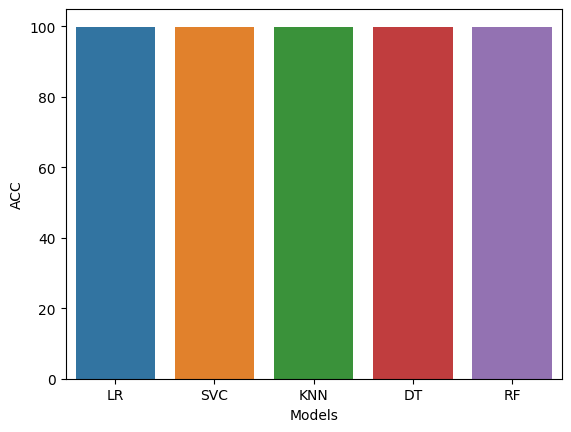

In [40]:
sns.barplot(x='Models', y='ACC', data=final_data)

In [41]:
corr=data.corr()

In [42]:
corr.style.background_gradient(cmap=\
                               'coolwarm')

,ssc_p,hsc_p,BE_p,Intern,Test_p,Branch,Status
ssc_p,1.000000,0.787661,0.781690,0.899713,0.789631,0.786782,0.902262
hsc_p,0.787661,1.000000,0.757877,0.865450,0.759019,0.753172,0.864478
BE_p,0.781690,0.757877,1.000000,0.866594,0.760581,0.762517,0.865528
Intern,0.899713,0.865450,0.866594,1.000000,0.871247,0.875085,0.990383
Test_p,0.789631,0.759019,0.760581,0.871247,1.000000,0.762531,0.876901
Branch,0.786782,0.753172,0.762517,0.875085,0.762531,1.000000,0.866398
Status,0.902262,0.864478,0.865528,0.990383,0.876901,0.866398,1.000000


<Axes: >

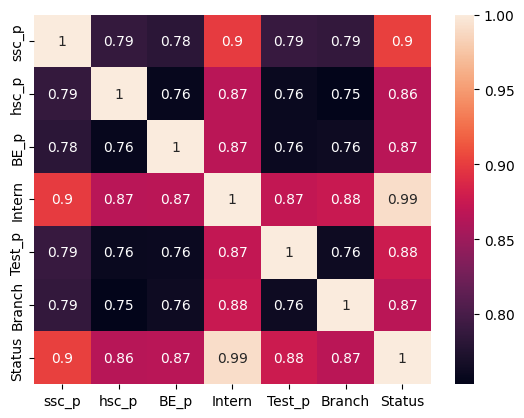

In [43]:
corr = data.corr()
sns.heatmap(corr, annot=True)

In [44]:
new_data = pd.DataFrame({
    'ssc_p':70.00,
    'hsc_p':80.00,
    'BE_p':60.00,
    'Intern':1,
    'Test_p':70,
    'Branch':5,
},index=[0])

In [45]:
lr= LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [46]:
p=lr.predict(new_data)
prob=lr.predict_proba(new_data)
if p==1:
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Can't be placed")

Placed
You will be placed with probability of 1.00


In [47]:
prob

array([[1.29356212e-06, 9.99998706e-01]])

In [48]:
import joblib

In [49]:
joblib.dump(lr,'model_final')

['model_final']

In [50]:
model = joblib.load('model_final')

In [51]:
model.predict(new_data)

array([1], dtype=int64)

In [52]:
# Recommendation Part
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [53]:
df=pd.read_csv("company.csv")

In [54]:
df.head()

,Company,ssc_p,hsc_p,BE_p,Test_p
0,Microsoft,75,75,85,85
1,Wipro,60,70,70,75
2,TCS,60,65,70,70
3,Apple,80,80,75,90
4,Google,80,80,85,90


In [55]:
df.tail()

,Company,ssc_p,hsc_p,BE_p,Test_p
25,IBM,60,60,70,75
26,Mphasis,60,60,65,65
27,Dropbox,65,65,70,75
28,Flipkart,70,70,75,70
29,PayPal,70,70,70,85


In [56]:
df.shape

(30, 5)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  30 non-null     object
 1   ssc_p    30 non-null     int64 
 2   hsc_p    30 non-null     int64 
 3   BE_p     30 non-null     int64 
 4   Test_p   30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [58]:
print(df.Company.head())

0    Microsoft
1        Wipro
2          TCS
3        Apple
4       Google
Name: Company, dtype: object


In [59]:
l2=df.iloc[:,-1:-5:-1]
l2

,Test_p,BE_p,hsc_p,ssc_p
0,85,85,75,75
1,75,70,70,60
2,70,70,65,60
3,90,75,80,80
4,90,85,80,80
5,70,75,75,70
6,80,75,75,70
7,70,70,65,60
8,75,75,60,60
9,80,75,75,70


In [60]:
kmeans=KMeans(5)
kmeans.fit(l2)
identified_clusters=kmeans.fit_predict(l2)
identified_clusters=list(identified_clusters)
identified_clusters

[2,
 3,
 3,
 2,
 2,
 0,
 4,
 3,
 1,
 4,
 1,
 3,
 3,
 0,
 2,
 4,
 1,
 1,
 4,
 0,
 4,
 0,
 3,
 3,
 0,
 1,
 3,
 3,
 0,
 4]

In [61]:
df['loc_cluster']=identified_clusters
df

,Company,ssc_p,hsc_p,BE_p,Test_p,loc_cluster
0,Microsoft,75,75,85,85,2
1,Wipro,60,70,70,75,3
2,TCS,60,65,70,70,3
3,Apple,80,80,75,90,2
4,Google,80,80,85,90,2
5,Upgrad,70,75,75,70,0
6,Dell,70,75,75,80,4
7,Cognizant,60,65,70,70,3
8,Capegemini,60,60,75,75,1
9,Amazon,70,75,75,80,4


In [ ]:
# GUI Part
from tkinter import *
import joblib
import numpy as np
from sklearn import *
import tkinter.font as font
import pandas as pd
from tkinter import messagebox as tkMessageBox
import tkinter as tk


def clicked():
    tkMessageBox.showerror("Warning!", "Please Enter Correct Values\nEnter percentage value between 0 to 100\nAll Fields are Mandatory")

root = Tk()
root.geometry('400x200+300+200')
l=tk.Label(root, text="Final Year Project", relief='ridge', border=10, font="Times 24", fg = "white", bg="firebrick1")
l.pack(side=TOP)
l1=tk.Label(root, text="Team Members:\n1. Kartikey Rai (1DB19CS066)\n2. Kumar Krishna (1DB19CS074)\n3. Pranjali (1DB19CS105)", font="Times", justify= LEFT)
l1.pack(pady=0)
button = Button(root, text = "Click Here for Instructions", command = clicked, bg='navy blue', fg='white', font=('Times'))
button.pack()
button.place(x=115, y=150)
root.mainloop()
    

def show_entry_fields():
    
# validation
    p1 =int(e1.get())
    p2= int(e2.get())
    p3= int(e3.get())
    p6= int(e6.get())
    textbox=Text(master)
    if (p1<0 or p2<0 or p3<0 or p6<0):
        tk.messagebox.showerror('Invalid Message Alert',"Negative values not allowed!")
    elif (p1>100 or p2>100 or p3> 100 or p6>100):
        tk.messagebox.showerror('Invalid Message Alert',"Enter Correct Values!")
    else:
        exit
        
    text = clicked1.get()
    if text == "CSE":
        p4=5
        print(p4)
    elif text == "ISE":
        p4=4
        print(p4)
    elif text == "ECE":
        p4=3
        print(p4)
    elif text == "EEE":
        p4=2
        print(p4)
    elif text == "MECH":
        p4=1
        print(p4)
    else:
        p4=0
        print(p4)
    
    
    text = clicked2.get()
    if text == "Yes":
        p5=1
        print(p5)
    else:
        p5=0
        print(p6)

    text1=clicked3.get()
    

#Prediction Part
    model = joblib.load('model_final')
    new_data = pd.DataFrame({
    'ssc_p':p1,
    'hsc_p':p2,
    'BE_p':p3,
    'Intern':p5,
    'Test_p':p6,
    'Branch':p4,
},index=[0])
    result=model.predict(new_data)
    result1=model.predict_proba(new_data)
    
    if result[0] == 0:
        Label(master, text="Not Eligible",font=("Ariel",15),fg='navy',bg='light sea green').grid(row=31)
    else:
        Label(master, text="Student Will be Placed With Probability of",font=("Arial", 15), bg='light sea green', fg='navy').grid(row=31)
        Label(master, text=round(result1[0][1],2)*100,font=("Arial", 15), bg='light sea green', fg='navy').grid(row=33)
        Label(master, text="Percent in",font=("Arial", 15), bg='light sea green', fg='navy').grid(row=34)
        Label(master, text=text1,font=("Ariel, 15"), bg='light sea green', fg='navy').grid(row=36)
        Label(master, text="Other Recommended Companies",font=("Times", 10),bg='light sea green', fg='navy').grid(row=37)

#Recommendation Part
        input_name=clicked3.get()
        cluster=df.loc[df['Company']==input_name,'loc_cluster']
        cluster=cluster.iloc[0]
        cluster
        company=df.loc[df['loc_cluster']==cluster,'Company']
        company
        for c in range(len(company)):
            if company.iloc[c]==input_name:
                continue
            else:
                textbox.insert(END, company.iloc[c]+ '\n')
                textbox.configure(bg='light sea green',fg='white', width=15, height=8)
                textbox.grid(row=39)
                

master = tk.Tk()
master.title("Campus Placement Prediction and Recommendation System")
master['background'] = 'light sea green'


label = Label(master, text = "Placement Prediction and Recommendations\nUsing Machine Learning Technique"
                          , relief='ridge', border=10, bg = "pink", fg = "red2",font=("Agency FB", 25)) \
                               .grid(row=0,columnspan=2)

Label(master, text="Secondary Education percentage- 10th Grade",font=("Times", 18),bg='light sea green',fg='white', justify= "left").grid(row=1, column=0)
Label(master, text="Higher Secondary Education percentage- 12th Grade",font=("Times", 18),bg='light sea green',fg='white', justify= "left").grid(row=2)
Label(master, text="BE Percentage",font=("Times", 18),bg='light sea green',fg='white').grid(row=3)
Label(master, text="Branch",font=("Times", 18),bg='light sea green',fg='white').grid(row=4)
Label(master, text="Internship",font=("Times", 18),bg='light sea green',fg='white').grid(row=5)
Label(master, text="Enter Assesment Percentage",font=("Times", 18),bg='light sea green',fg='white').grid(row=6)
Label(master, text="Select your desired company",font=("Times", 18),bg='light sea green',fg='white').grid(row=7)


clicked1 = StringVar()
options1 = ["CSE","ISE","ECE","EEE","MECH","CIVIL"]

clicked2 = StringVar()
options2 = ["Yes","No"]

clicked3 = StringVar()
options3 = ["Amazon","Google","TCS","Wipro","IBM","Apple","Flipkart","Accenture","HP","Deloitte"]

e1=StringVar()
e1 = Entry(master)
e1.grid(row=1, column=1)

e2=StringVar()
e2 = Entry(master)
e2.grid(row=2, column=1)

e3=StringVar()
e3 = Entry(master)
e3.grid(row=3, column=1)

e4 = OptionMenu(master , clicked1 , *options1 )
e4.configure(width=13,fg="white",bg="slate grey")
e4.grid(row=4, column=1)
clicked1.set("Select")

e5 = OptionMenu(master , clicked2 , *options2)
e5.configure(width=13,fg="white",bg="slate grey")
e5.grid(row=5, column=1)
clicked2.set("Select")

e6 = Entry(master)
e6.grid(row=6, column=1)

e7 = OptionMenu(master , clicked3 , *options3 )
e7.configure(width=13,fg="white",bg="slate gray")
e7.grid(row=7, column=1)
clicked3.set("Select")


buttonFont = font.Font(family='Helvetica', size=16, weight='bold')
Button(master, text='Predict',height= 1, width=8,activebackground='#00ff00',font=buttonFont,bg='green', fg='white',command=show_entry_fields).grid()
master.mainloop()